## Using the distance matricies I created in [the distance API notebook](http://localhost:8888/notebooks/Desktop/CapstoneMSGT/Notebooks/TestinBingAPI.ipynb) to try MDS

This one is for Congressional District 9, using 0.01 degree intervals for the mesh.

In [4]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from decimal import Decimal

#queue up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/09/CD09_01dmx.pkl')
dmatrix2 = dmatrix.astype(float)

#create a list of points from the df header to plot
geopoints = list(dmatrix)

#plot the points from the dmatrix headings
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
#compare to the shapefile (can never be too careful...)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

pts = 'Shapes/09/CD09_01pts.shp'
CD_grid = gpd.read_file(pts)
CD_grid.plot(ax=ax2)
ax2.set_title('CD09_01pts.shp')

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])



[]

In [5]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances

#need to remove a NaN at the intersection of the final row/column
dmatrix2.fillna(0, inplace = True)  
NaN = Decimal('NaN')
dmatrix.replace(NaN, 0)
#taking a look to see if anything else changed since we saved the distance matrix in the Bing API notebook:



,"(47.50354099999961, -122.31306799999875)","(47.50354099999961, -122.29306799999874)","(47.30354099999965, -122.36306799999878)","(47.30354099999965, -122.35306799999877)","(47.30354099999965, -122.34306799999877)","(47.30354099999965, -122.33306799999876)","(47.30354099999965, -122.32306799999876)","(47.30354099999965, -122.31306799999875)","(47.30354099999965, -122.30306799999875)","(47.523540999999604, -122.18306799999868)",...,"(47.48354099999961, -122.31306799999875)","(47.48354099999961, -122.29306799999874)","(47.48354099999961, -122.28306799999874)","(47.48354099999961, -122.27306799999873)","(47.48354099999961, -122.26306799999873)","(47.523540999999604, -122.10306799999864)","(47.48354099999961, -122.25306799999872)","(47.48354099999961, -122.24306799999871)","(47.48354099999961, -122.23306799999871)","(47.30354099999965, -122.29306799999874)"
"(47.50354099999961, -122.31306799999875)",0,540,2452,2532,2346,2236,2265,2079,2217,2015,...,448,556,709,578,784,2747,889,1011,1119,2320.0
"(47.50354099999961, -122.29306799999874)",540,0,2373,2469,2274,2165,2227,2036,2168,1559,...,443,292,337,228,435,2635,351,472,581,2052.0
"(47.30354099999965, -122.36306799999878)",2452,2373,0,296,370,406,572,697,768,2998,...,2354,2492,2423,2266,2311,4010,2643,2704,2763,778.0
"(47.30354099999965, -122.35306799999877)",2532,2469,296,0,402,438,603,734,822,3172,...,2406,2555,2485,2328,2374,4059,2705,2759,2825,820.0
"(47.30354099999965, -122.34306799999877)",2346,2274,370,402,0,195,361,448,582,3264,...,2642,2787,2703,2555,2603,4361,2924,3008,3129,563.0
"(47.30354099999965, -122.33306799999876)",2236,2165,406,438,195,0,163,262,387,3593,...,2323,2468,2382,2237,2285,4020,2602,2682,2778,369.0
"(47.30354099999965, -122.32306799999876)",2265,2227,572,603,361,163,0,236,370,3142,...,2312,2441,2343,2219,2269,3980,2579,2648,2757,352.0
"(47.30354099999965, -122.31306799999875)",2079,2036,697,734,448,262,236,0,199,3018,...,2426,2545,2465,2322,2377,4116,2683,2759,2880,305.0
"(47.30354099999965, -122.30306799999875)",2217,2168,768,822,582,387,370,199,0,3230,...,1871,1999,1914,1776,1841,3588,2134,2184,2168,269.0
"(47.523540999999604, -122.18306799999868)",2015,1559,2998,3172,3264,3593,3142,3018,3230,0,...,2004,2199,2157,2003,2076,1088,1442,1151,1143,2410.0


In [6]:
# pass the travel time matrix to a pairwise_distance function per https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
D = pairwise_distances(dmatrix2)

# pass the pairwise_distance array back to pandas dataframe for a better visualization.
edm = pd.DataFrame(D)  #edm = euclidean distance matrix
edm
#The main problem here is that I have no idea how it is arriving at these pairwise distance values. The point geometry is stored as a tuple in the dataframe index and header (firts row/column).
#However, after passing the distance matrix to the pairwise_distances function, the header and index are re-assigned intiger values. To complicate matters, the unique combination function 
#I perfomred in the Bing API function to create this matrix randomized the points. To see this illustrated, look at the colors in the left plot above. They should show a smooth color ramp,
#but you can see they jump around a bit.

,0,1,2,3,4,5,6,7,8,9,...,622,623,624,625,626,627,628,629,630,631
0,0.000000,9969.106931,33786.593362,35141.832522,38965.770953,36106.810244,31759.379182,33934.773242,30512.570901,26303.752812,...,14569.561901,11931.437298,13428.833084,16509.814536,15724.390227,30858.549561,14030.408832,14879.461818,14748.058347,21225.529298
1,9969.106931,0.000000,39959.876676,41770.603922,45854.840497,42518.639736,37842.947758,40151.121578,36572.873171,26307.197437,...,9957.733226,7940.572838,8684.796543,10253.338627,9663.920892,33462.319256,8021.949825,9164.013258,9607.939009,22299.492931
2,33786.593362,39959.876676,0.000000,3613.795512,7736.080726,6027.485297,3909.890152,5479.360364,8382.234070,49169.027273,...,38729.169588,37915.051062,38495.661613,40692.946133,40174.405845,50239.256523,40866.346534,41683.763758,42161.961838,24317.374098
3,35141.832522,41770.603922,3613.795512,0.000000,5767.398634,4981.398900,5563.931254,6918.523397,9362.821049,50011.098318,...,40835.135129,39873.454917,40514.911934,42861.045846,42305.753356,50593.286096,42725.550634,43513.495481,43883.290806,26897.433911
4,38965.770953,45854.840497,7736.080726,5767.398634,0.000000,7201.321268,9579.386619,7981.438028,12727.966098,54044.337428,...,45130.046532,44178.139911,44868.960028,47250.052868,46697.397572,54106.681408,47127.424797,47915.012407,48152.368052,31210.749110
5,36106.810244,42518.639736,6027.485297,4981.398900,7201.321268,0.000000,6176.561989,7211.329628,8713.728192,51005.067944,...,41498.083136,40656.213031,41249.015091,43475.440032,42953.944685,51827.828442,43485.123847,44298.117183,44637.259425,27168.583511
6,31759.379182,37842.947758,3909.890152,5563.931254,9579.386619,6176.561989,0.000000,5348.303376,6282.276896,47351.681174,...,36645.018788,35879.687150,36425.390732,38613.155271,38104.632737,48789.807839,38800.370385,39593.101268,40005.267591,22235.230829
7,33934.773242,40151.121578,5479.360364,6918.523397,7981.438028,7211.329628,5348.303376,0.000000,8867.086218,49948.506134,...,39037.484665,38325.050985,38925.785271,41104.560197,40609.795801,50974.681500,41409.460187,42216.514198,42519.704891,24771.861315
8,30512.570901,36572.873171,8382.234070,9362.821049,12727.966098,8713.728192,6282.276896,8867.086218,0.000000,46467.867166,...,35505.913522,34806.045380,35324.388785,37444.472850,36969.127972,48333.935387,37655.827265,38383.049188,38719.650799,21437.271865
9,26303.752812,26307.197437,49169.027273,50011.098318,54044.337428,51005.067944,47351.681174,49948.506134,46467.867166,0.000000,...,26504.543837,25862.514379,25978.768370,27367.426404,26779.527143,16502.546440,23973.747141,22603.626656,21430.993887,36042.345734


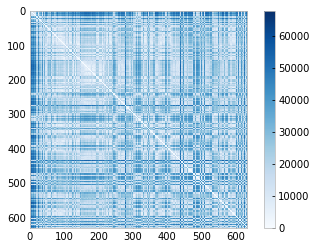

In [8]:
#visualizing the pairwise_distance array:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();


In [9]:
ttm = dmatrix2 #make a copy so I don't accidentally break stuff.

model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm)
#plt.scatter(out[:, 0], out[:, 1], c=colors)
#plt.axis('equal');

#this method is giving me something similar, only rotated 90 degrees counterclockwise (even the point colors correlate)

[]

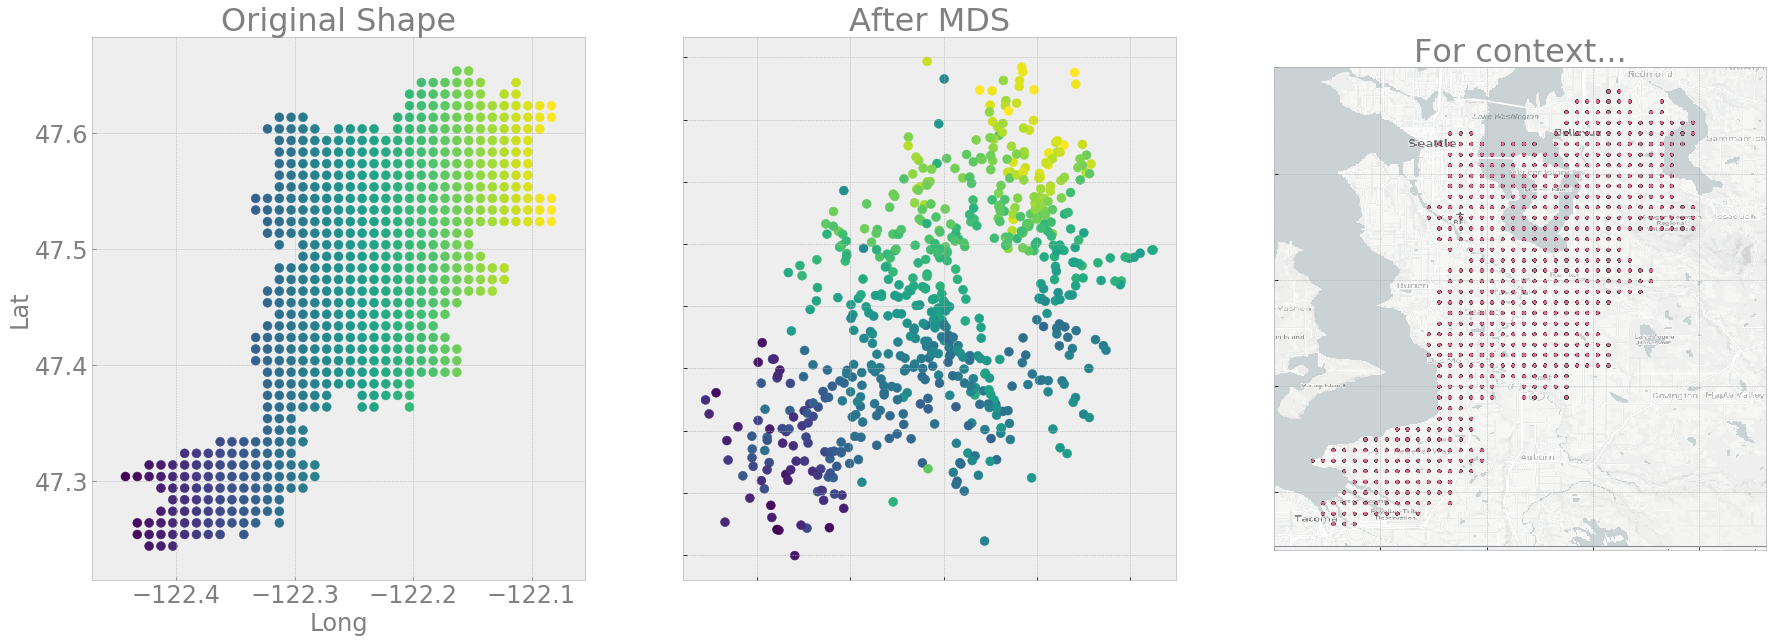

In [30]:
#lets compare the MDS results to our original
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

ax1.scatter(lat,long, s = 80, c =lat, cmap=plt.cm.viridis)
ax1.set_title('Original Shape', color='gray', fontsize=32)
ax1.set_ylabel('Lat', color='gray', fontsize=24)
ax1.set_xlabel('Long', color='gray', fontsize=24)
ax1.tick_params(colors='gray', labelsize=24)

ax2.scatter(out[:, 0], out[:, 1],s = 80, c =lat, cmap=plt.cm.viridis)   
ax2.set_title('After MDS', color='gray', size=32)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

img = plt.imread('Shapes/09/CD09_01.png')
ax3.imshow(img)
ax3.set_title('For context...', color='gray', size=32)
ax3.set_yticklabels([])
ax3.set_xticklabels([])



In [26]:
print(out)

[[  567.35672631 -1234.15007929]
 [  425.53626335  -680.38650924]
 [-1866.22993296 -1257.4916012 ]
 ...
 [  402.9960273   -257.0098304 ]
 [  400.69756988  -170.41241131]
 [-1038.27148463  -542.46863193]]
